# Client: Sales Effectiveness | Category: Product Sales
# Project Ref: PM-PR-0019

<img src="Sales_effectiveness_image.jpg" width="">

# Contents

* BUSINESS CASE
* PROJECT GOAL
* DATA
* DATA DISTRIBUTION
* DOMAIN ANALYSIS
* DATA DESCRIPTION
  - Insights from description
  - Drop unwanted columns
  - Handling missing values with mode
* DISTRIBUTION OF DATA WITH PIE CHART
* EDA
  - Univariate Analysis
    - Univariate analysis using histogram
    - Univariate analysis using countplot
  - Bivariate Analysis
    - Bivariate analysis using relplot
    - Bivariate analysis using barplot
    - Bivariate analysis using lineplot
    - Bivariate analysis using histplot
* DATA ANALYSIS REPORT
* DATA PREPROCESSING
  - Encoding
    - Manual Encoding
  - Scaling with MinmaxScaler
* FEATURE SCALING
* MODEL CREATION
  - Train Test Split
  - Smoting Technique
* MODEL EVALUATION
  -  Logistic Regression
  -  Support Vector Machine
  -  K-Nearest Neighbor
  -  Decision Tree Classifier
  -  Random Forest Classifier
  -  Gradient Boosting
  -  Xtreme Gradient Boost
  -  Artificial Neural Network
* MODEL COMPARISON REPORT
* CONCLUSION

# Business Case 

* FicZon Inc is an IT solution provider with products ranging from on-premises products to SAAS based solutions. FicZon major leads generation channel is digital and through their website.


* FicZon business is majorly dependent on the sales force effectiveness. As the market is maturing and more new competitors entering the market, FicZon is experiencing the dip in sales.


* Effective sales is dependent on lead quality and as of now, this is based on manual categorization and highly depended on sales staff. Though there is a quality process, which continuously updates the lead categorization, it’s value is in for post analysis, rather than conversation.


* FicZon wants to explore Machine Learning to pre-categorize the lead quality and as result, expecting significant increase in sales effectiveness.

# PROJECT GOAL:
1. Data exploration insights – Sales effectiveness.
2. ML model to predict the Lead Category (High Potential , Low Potential)

In [8]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Importing required libraries

import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# connecting to SQL server
connection = mysql.connector.connect(host = '18.136.157.135',
                                     user = 'dm_team2',
                                     password = 'DM!$Team&27@9!20!',
                                     database = 'project_sales')

# Data

In [2]:
data = pd.read_sql_query("select * from data", connection)
data

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


# Data Distribution

In [3]:
data['Created'].value_counts()

26-09-2018 11:30    4
27-09-2018 11:00    4
10-05-2018 12:30    4
15-10-2018 10:36    4
14-09-2018 12:00    4
                   ..
29-08-2018 12:52    1
29-08-2018 13:08    1
29-08-2018 15:26    1
29-08-2018 15:39    1
28-04-2018 07:54    1
Name: Created, Length: 6752, dtype: int64

In [4]:
data['Product_ID'].unique()

array(['', '9', '19', '18', '15', '27', '5', '2', '3', '25', '10', '20',
       '11', '21', '1', '12', '13', '17', '24', '26', '16', '23', '22',
       '8', '14', '6', '0', '28', '7', '4'], dtype=object)

In [5]:
data['Product_ID'].value_counts()

18    1711
15    1518
19    1189
9      992
27     739
5      487
10     168
1      105
20     102
25      90
21      66
        58
2       38
12      36
26      31
14      27
11      12
22       8
3        7
17       7
6        7
8        6
13       5
24       3
16       3
23       2
0        2
28       1
7        1
4        1
Name: Product_ID, dtype: int64

In [6]:
data['Source'].unique()

array(['Website', '', 'Live Chat-Google Organic', 'Call',
       'Live Chat-Direct', 'By Recommendation', 'Customer Referral',
       'Live Chat-Blog', 'Live Chat -PPC', 'Live Chat-Google Ads',
       'Live Chat-Adwords Remarketing', 'E-Mail Message',
       'Existing Client', 'Live Chat-CPC', 'Existing Customer',
       'Live Chat-Quora', 'US Website', 'Just Dial', 'Campaign', 'Other',
       'E-mail Campaign', 'CRM form', 'SMS Campaign', 'Personal Contact',
       'Live Chat-Youtube', 'Live Chat-Justdial'], dtype=object)

In [7]:
data['Source'].value_counts()

Call                             2547
Live Chat-Direct                 1834
Website                          1594
Live Chat-Google Organic          274
Live Chat -PPC                    249
Live Chat-Blog                    237
Customer Referral                 180
US Website                        137
Just Dial                          56
Existing Client                    51
Personal Contact                   50
Live Chat-CPC                      50
By Recommendation                  32
CRM form                           23
Existing Customer                  22
Live Chat-Google Ads               21
Campaign                           19
                                   17
E-mail Campaign                    12
Live Chat-Adwords Remarketing       7
Live Chat-Quora                     2
Other                               2
SMS Campaign                        2
Live Chat-Youtube                   2
E-Mail Message                      1
Live Chat-Justdial                  1
Name: Source

In [8]:
data['Mobile'].value_counts()

              1810
XXXXXXX        222
988XXXXXXX     211
984XXXXXXX     177
998XXXXXXX     125
              ... 
610XXXXXXX       1
(41XXXXXXX       1
78 XXXXXXX       1
88 XXXXXXX       1
436XXXXXXX       1
Name: Mobile, Length: 487, dtype: int64

In [9]:
data['Sales_Agent'].unique()

array(['Sales-Agent-11', 'Sales-Agent-10', 'Sales-Agent-3',
       'Sales-Agent-4', 'Sales-Agent-9', 'Sales-Agent-7', '',
       'Sales-Agent-8', 'Sales-Agent-5', 'Sales-Agent-2',
       'Sales-Agent-12', 'Sales-Agent-1', 'Sales-Agent-6'], dtype=object)

In [10]:
data['Sales_Agent'].value_counts()

Sales-Agent-4     1500
Sales-Agent-11    1420
Sales-Agent-5     1190
Sales-Agent-9      879
Sales-Agent-3      781
Sales-Agent-7      736
Sales-Agent-2      389
Sales-Agent-12     269
Sales-Agent-6      114
Sales-Agent-8       68
Sales-Agent-10      49
                    23
Sales-Agent-1        4
Name: Sales_Agent, dtype: int64

In [11]:
data['Location'].unique()

array(['', 'Bangalore', 'Other Locations', 'UAE', 'Trivandrum',
       'Hyderabad', 'Chennai', 'UK', 'USA', 'Delhi', 'Mumbai', 'Kolkata',
       'Singapore', 'Pune', 'AUSTRALIA', 'EUROPE', 'Malaysia', 'Howrah'],
      dtype=object)

In [12]:
data['Location'].value_counts()

Other Locations    2500
Bangalore          2084
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              402
Pune                142
UAE                  79
                     58
Trivandrum           58
Kolkata              55
USA                  45
UK                   41
AUSTRALIA            25
Singapore            17
Malaysia              4
EUROPE                3
Howrah                1
Name: Location, dtype: int64

In [13]:
data['Delivery_Mode'].unique()

array(['Mode-5', 'Mode-1', 'Mode-3', 'Mode-2', 'Mode-4'], dtype=object)

In [14]:
data['Delivery_Mode'].value_counts()

Mode-5    2975
Mode-1    2627
Mode-3    1688
Mode-4     121
Mode-2      11
Name: Delivery_Mode, dtype: int64

In [15]:
data['Status'].unique()

array(['Open', 'Potential', 'In Progress Positive', 'Not Responding',
       'Just Enquiry', 'Junk Lead', 'CONVERTED', 'In Progress Negative',
       'LOST', 'Long Term', 'converted'], dtype=object)

In [16]:
data['Status'].value_counts()

Junk Lead               1536
Not Responding          1129
CONVERTED                834
Just Enquiry             760
Potential                708
Long Term                646
In Progress Positive     643
In Progress Negative     626
LOST                     440
Open                      82
converted                 18
Name: Status, dtype: int64

# Domain Analysis

### Created : 
Date or timestamp indicating when the entry was created.

### Product_ID :
 Identifier for the product being sold.
 
### Source :
 leads are generated from diverse sources, including website visits, live chat platforms, referrals, campaigns, and personal contacts. By analyzing the distribution of leads across these domains, businesses can optimize their marketing strategies, allocate resources effectively, and tailor outreach efforts to maximize conversion rates and customer engagement.

### Mobile :
Mobile phone number of the customer.

### Sales_Agent :
The agent responsible for the sale. 

### Location :
Location from where the sales is taking place.

### Delivery_Mode :
Mode of delivery for the product, such as shipping, pickup, etc. Here, the modes are justified as Mode-1, Mode-2, Mode-3, Mode-4, Mode-5.

### Status :
It represents the current stage or status of leads or customers in your sales or conversion process. 

# Data Description

In [17]:
data.describe()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
count,7422,7422,7422,7422,7422,7422,7422,7422,7422
unique,6752,30,26,487,883,13,18,5,11
top,26-09-2018 11:30,18,Call,,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
freq,4,1711,2547,1810,1701,1500,2500,2975,1536


## Insights from Description

* The dataset contains 7422 entries related to sales leads or transactions.
* 'Call' seems to be the primary source of leads, and 'Sales-Agent-4' is a significant contributor, suggesting specific agents may handle a substantial volume of leads.
* A large number of entries have missing or erroneous data in the 'EMAIL' field, indicated by '#VALUE!', which might require cleaning or investigation.
* 'Other Locations' seem to be a common entry in the 'Location' field, which might need further categorization or clarification.
* The most frequent status being 'Junk Lead' suggests a significant portion of leads may not be viable for conversion, indicating potential issues with lead quality or targeting.


##### Now we need to label the values based on thier similarities from different columns 

In [18]:
data.Source.replace(['Live Chat-Direct','Live Chat-Google Organic','Live Chat -PPC','Live Chat-Blog','Live Chat-CPC',
                    'Live Chat-Google Ads','Live Chat-Adwords Remarketing','Live Chat-Quora','Live Chat-Youtube',
                    'Live Chat-Justdial'],'live chat',inplace=True)

data.Source.replace(['Existing Client','Personal Contact','CRM form','Existing Customer'],'clients',inplace=True)

data.Source.replace(['US Website','Just Dial'],'social',inplace=True)

data.Source.replace(['Customer Referral','By Recommendation'],'recommendation',inplace=True)

data.Source.replace(['Campaign','E-mail Campaign','SMS Campaign','E-Mail Message'],'campaign',inplace=True)

In [19]:
data['Source'].value_counts()

live chat         2677
Call              2547
Website           1594
recommendation     212
social             193
clients            146
campaign            34
                    17
Other                2
Name: Source, dtype: int64

In [20]:
data.Location.replace(['Bangalore','Trivandrum','Hyderabad','Chennai'],'Southern_India',inplace=True)

data.Location.replace(['Delhi','Kolkata'],'Northern_India',inplace=True)

data.Location.replace(['Mumbai','Pune'],'Western_India',inplace=True)

data.Location.replace(['Howrah'],'Eastern_India',inplace=True)


In [21]:
data['Location'].unique()

array(['', 'Southern_India', 'Other Locations', 'UAE', 'UK', 'USA',
       'Northern_India', 'Western_India', 'Singapore', 'AUSTRALIA',
       'EUROPE', 'Malaysia', 'Eastern_India'], dtype=object)

In [22]:
# group as low potential by negative status
data.Status.replace(['Junk Lead', 'Not Responding', 'In Progress Negative', 'LOST', 'Just Enquiry'], 'low potential', inplace=True)

# group as high potential by positive status
data.Status.replace(['CONVERTED', 'Potential', 'Long Term', 'In Progress Positive', 'converted', 'Open'], 'high potential', inplace=True)
   

In [23]:
data['Status'].unique()

array(['high potential', 'low potential'], dtype=object)

In [24]:
# group the min sold as 0
data.Product_ID.replace(['11','22','3','17','6','8','13','24','16','23','28','7','4'], 0, inplace=True)
data.Product_ID.replace([''], '18', inplace=True)

data.Product_ID.value_counts()

18    1769
15    1518
19    1189
9      992
27     739
5      487
10     168
1      105
20     102
25      90
21      66
0       63
2       38
12      36
26      31
14      27
0        2
Name: Product_ID, dtype: int64

##### Min sold products are : 3, 4, 6, 7, 8, 11, 13, 16, 17, 22, 23, 24, 28

In [25]:
data['Product_ID'] = data['Product_ID'].astype(str) # because 0 is in int datatype

## Drop unwanted columns

In [26]:
data.drop(['Created', 'Mobile', 'EMAIL'], axis=1, inplace=True)
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,18,Website,Sales-Agent-11,,Mode-5,high potential
1,18,Website,Sales-Agent-10,,Mode-5,high potential
2,18,Website,Sales-Agent-10,,Mode-5,high potential
3,18,Website,Sales-Agent-10,,Mode-5,high potential
4,18,Website,Sales-Agent-10,,Mode-5,high potential


## Handling the missing values with mode

In [27]:
data.Source.replace([''], 'Call', inplace=True)
data.Sales_Agent.replace([''], 'Sales-Agent-4', inplace=True)
data.Location.replace([''], 'Southern_India', inplace=True)

In [28]:
## No. of labels containing

for col in data.columns:
  print(col, ':', len(data[col].unique()), 'labels')

Product_ID : 16 labels
Source : 8 labels
Sales_Agent : 12 labels
Location : 12 labels
Delivery_Mode : 5 labels
Status : 2 labels


In [29]:
data

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,18,Website,Sales-Agent-11,Southern_India,Mode-5,high potential
1,18,Website,Sales-Agent-10,Southern_India,Mode-5,high potential
2,18,Website,Sales-Agent-10,Southern_India,Mode-5,high potential
3,18,Website,Sales-Agent-10,Southern_India,Mode-5,high potential
4,18,Website,Sales-Agent-10,Southern_India,Mode-5,high potential
...,...,...,...,...,...,...
7417,9,Call,Sales-Agent-6,Western_India,Mode-4,low potential
7418,15,Call,Sales-Agent-12,Other Locations,Mode-5,low potential
7419,5,live chat,Sales-Agent-11,Southern_India,Mode-1,low potential
7420,21,clients,Sales-Agent-4,Other Locations,Mode-1,low potential


# Distribution of data with pie chart

In [30]:
from ipywidgets import interact

# Function to create pie charts for selected columns
def plot_pie(column_name):
    plt.figure(figsize=(8,8), facecolor='white')
    
    category_counts = data[column_name].value_counts()
    plt.pie(category_counts, labels=category_counts.index, autopct='%.2f%%', startangle=90, textprops={'fontsize': 8})
    plt.title(f'Distribution of {column_name}', fontsize=15)
    plt.show()

# Get the list of columns for which you want to create pie charts
columns_for_pie = ['Product_ID', 'Source', 'Sales_Agent', 'Location', 'Delivery_Mode', 'Status']

# Create an interactive widget with a dropdown menu
interact(plot_pie, column_name=columns_for_pie)

interactive(children=(Dropdown(description='column_name', options=('Product_ID', 'Source', 'Sales_Agent', 'Loc…

<function __main__.plot_pie(column_name)>

# EDA (Exploratory Data Analysis)
## Univariate Analysis

### Univariate Analysis using Histogram

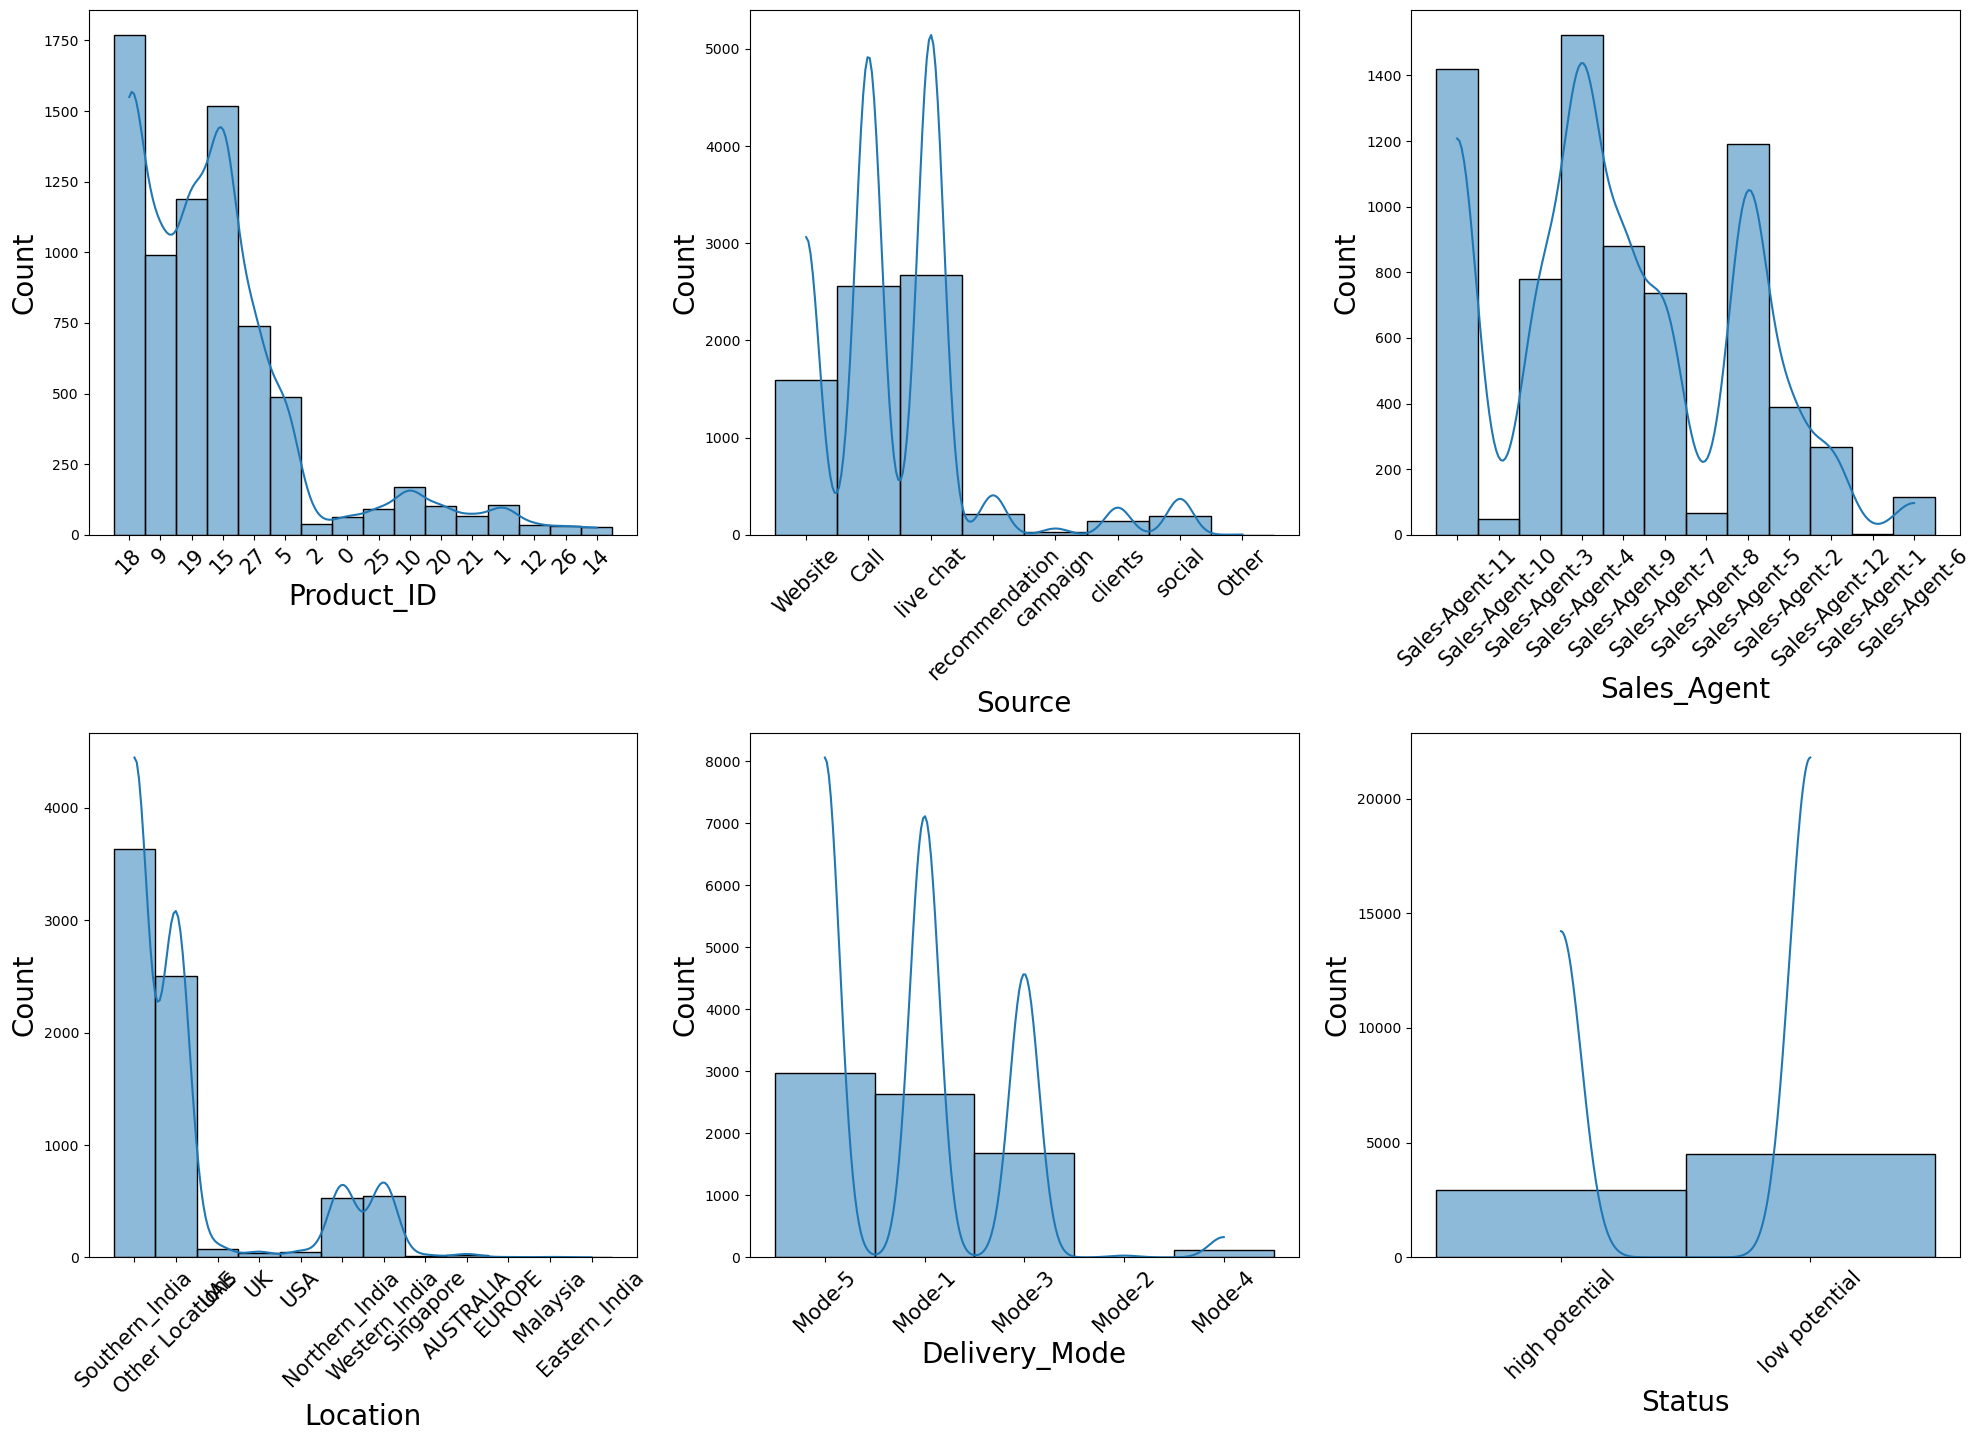

In [31]:
plt.figure(figsize=(20,20))

plotnumber=1
for column in data:
    ax = plt.subplot(3,3,plotnumber)
    sns.histplot(data[column], kde = True)
    plt.xlabel(column,fontsize=20)
    plt.ylabel('Count',fontsize=20)
    plt.xticks(rotation=45, fontsize=15)
    plotnumber+=1

plt.tight_layout()

### Univariate Analysis using countplot

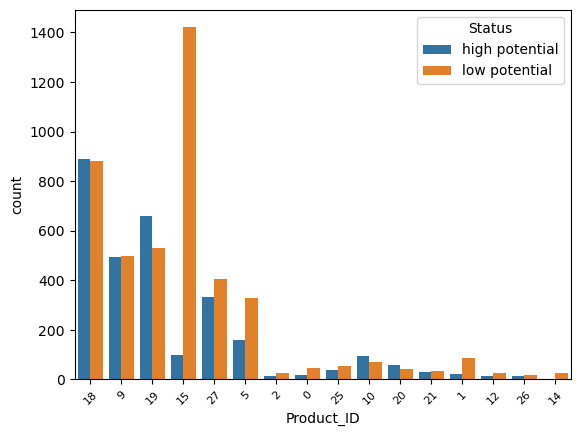

In [35]:
sns.countplot(x='Product_ID',hue='Status',data=data)
plt.xticks(rotation=45, fontsize=8)
plt.show()

##### Insights :
* Product 15 is giving the most count of low potential than high potential. (This could suggest that Product 15 may not be meeting customer expectations or may have certain limitations that hinder its market acceptance or performance.)


* Products whose ID is 19, 10 & 20 has high chances of getting high potential status. ( This observation suggests that these products may possess characteristics, features, or market positioning that resonate well with customers and drive positive perceptions.)

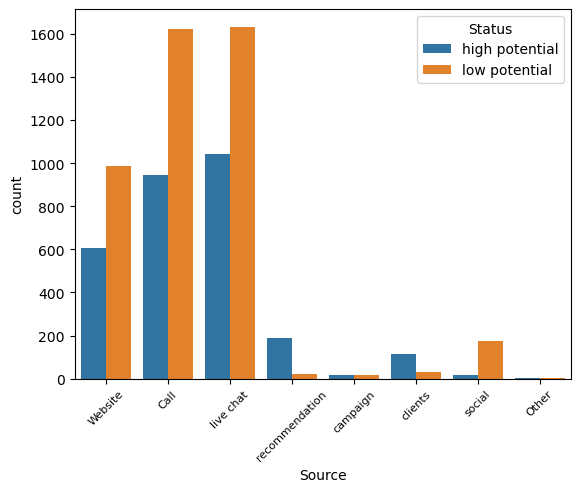

In [36]:
sns.countplot(x='Source',hue='Status',data=data)
plt.xticks(rotation=45, fontsize=8)
plt.show()

##### Insights :
* The interactions origination from sources such as website, call, live chat and social platforms are more likely to result in low potential outcomes.

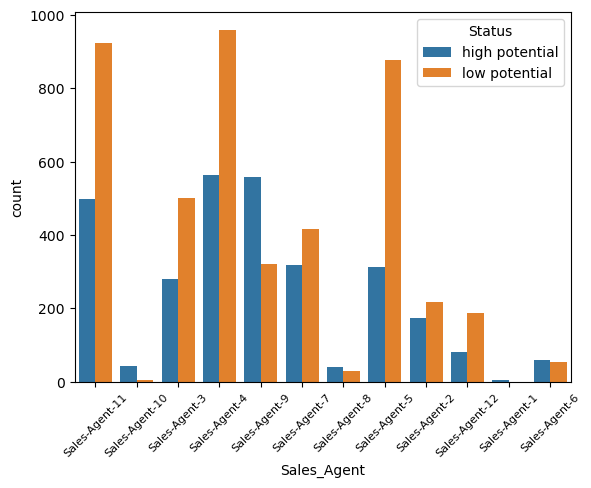

In [37]:
sns.countplot(x='Sales_Agent',hue='Status',data=data)
plt.xticks(rotation=45, fontsize=8)
plt.show()

##### Insights :
* The sales agent no 2, 3, 4, 5, 7, 11, 12 are more likely to result in low potential outcomes. (may have lower conversion rates or success rates in turning leads into high-potential opportunities. This could be due to various factors such as inadequate sales skills, lack of product knowledge, poor communication, or ineffective sales strategies.)


* The sales agent no 1, 6, 8, 9 and 10 are more likely to result in high potential outcomes. (These agents might demonstrate stronger sales skills, better rapport-building abilities, effective problem-solving skills, and a deeper understanding of customer needs and preferences.)

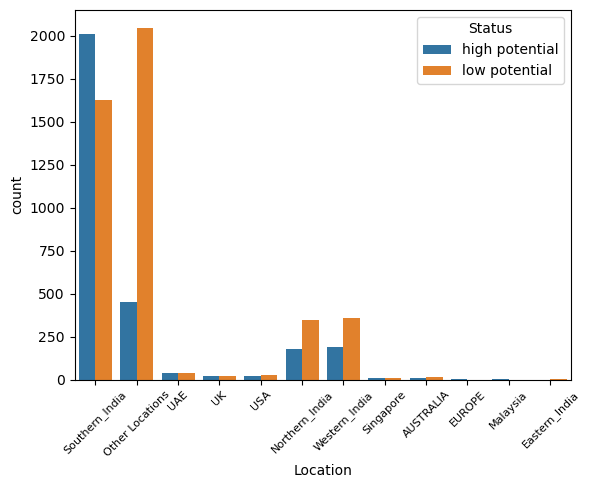

In [38]:
sns.countplot(x='Location',hue='Status',data=data)
plt.xticks(rotation=45, fontsize=8)
plt.show()

##### Insights :
* The Northern India, Western India, and Australia are more likely to result in low potential. (This could be due to various factors such as market dynamics, competition, economic conditions, or customer preferences specific to these regions.)


* The Other Location part contains high potential result. (Indicating that leads or opportunities originating from diverse or unspecified locations may have better conversion rates or higher success probabilities.)

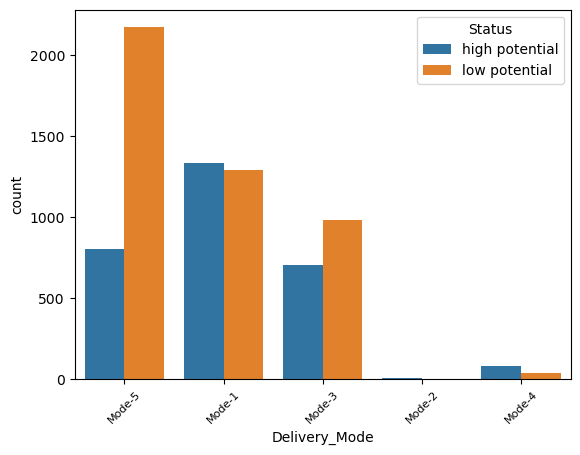

In [39]:
sns.countplot(x='Delivery_Mode',hue='Status',data=data)
plt.xticks(rotation=45, fontsize=8)
plt.show()

##### Insights :
* Delivery mode 5 and 3 are likely to result in low potential. (This could be due to factors such as longer delivery times, lower reliability, higher costs, or suboptimal customer experiences associated with these modes.)


* Delivery mode 1 and 4 are likely to result in high potential. (Indicating that they may offer faster, more reliable, or more cost-effective delivery options that resonate well with customers and drive positive perceptions.)

## Bivariate Analysis
### Bivariate Analysis using relplot

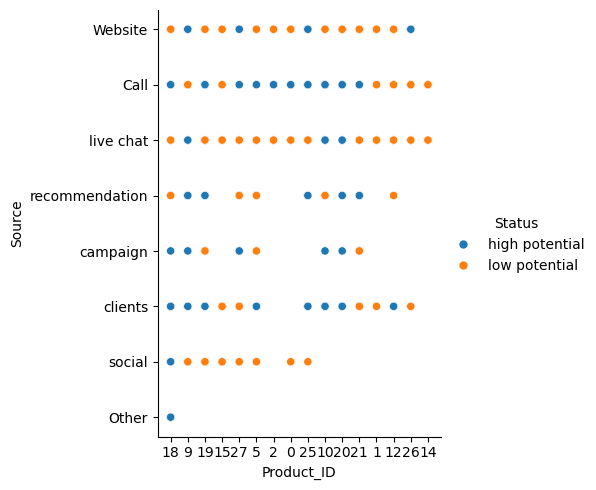

In [41]:
sns.relplot(x='Product_ID', y='Source', data = data, hue = 'Status')

##### Insights :
* Website exibits high potential when their product ID is 9, 27, 25, 26.
* Call exibits high potential when their product ID is 18, 19, 27, 5, 2, 0, 25, 10, 20, 21.
* Live chat exibits high potential when their product ID is 9, 10, 20.
* Recommendation exibits high potential when their product ID is 9, 19, 25, 20, 21.
* Campaign exibits high potential when their product ID is 18, 9, 27, 10, 20.
* Clients exibits high potential when their product ID is 18, 9, 19, 5, 25, 10, 20, 12.
* Social exibits high potential when their product ID is 18.
* Other exibits high potential when their product ID is 18.

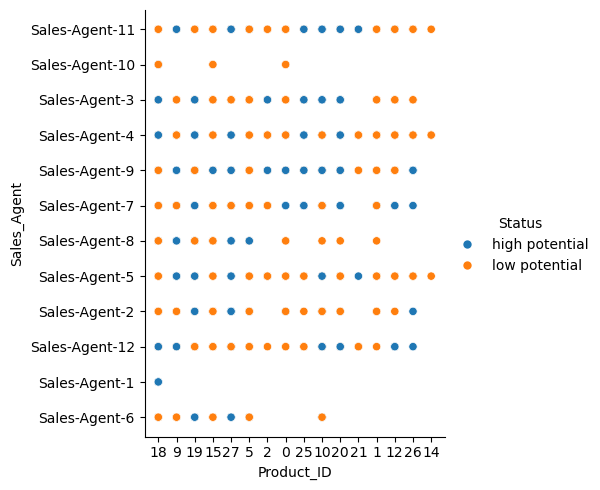

In [42]:
sns.relplot(x='Product_ID', y='Sales_Agent', data = data, hue = 'Status')

##### Insights :
* Sales agent 1 has only high potential status when it solds the product whose ID is 18.
* Sales agent 2 has high potential status when it solds the product whose ID's are 19, 27, 26.
* Sales agent 3 has high potential status when it solds the product whose ID's are 18, 19, 2, 25, 10, 20.
* Sales agent 4 has high potential status when it solds the product whose ID's are 18, 19, 27, 25, 20.
* Sales agent 5 has high potential status when it solds the product whose ID's are 9, 19, 27, 10, 21.
* Sales agent 6 has high potential status when it solds the product whose ID's are 19, 27.
* Sales agent 7 has high potential status when it solds the product whose ID's are 19, 0, 25, 12, 26.
* Sales agent 8 has high potential status when it solds the product whose ID's are 9, 27, 5.
* Sales agent 9 has high potential status when it solds the product whose ID's are 9, 15, 27, 2, 0, 25, 10, 20, 26.
* Sales agent 10 has no high potential while selling the product.
* Sales agent 11 has high potential status when it solds the product whose ID's are 9, 27, 25, 10, 20, 21.
* Sales agent 12 has high potential status when it solds the product whose ID's are 18, 9, 10, 20, 12, 26.

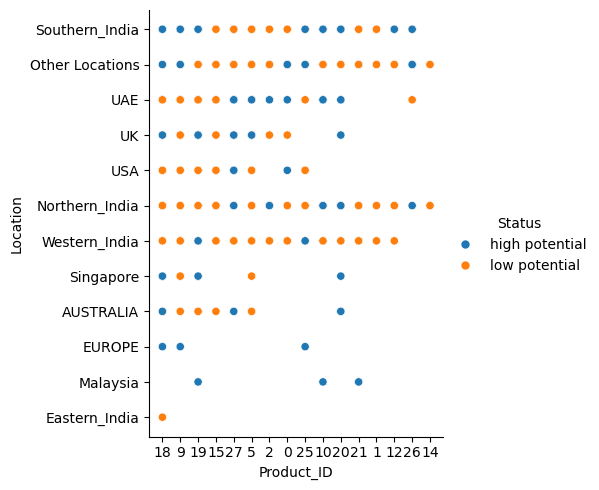

In [43]:
sns.relplot(x='Product_ID', y='Location', data = data, hue = 'Status')

##### Insights : 
* Southern India exibits high potential in product whose ID's are 18, 9, 19, 25, 10, 20, 12, 26.
* Other Locations exibits high potential in product whose ID's are 18, 9, 0, 25, 26.
* UAE exibits high potential in product whose ID's are 27, 5, 2, 0, 10, 20.
* UK exibits high potential in product whose ID's are 18, 19, 27, 5, 20.
* USA exibits high potential in product whose ID's are 27, 0.
* Northern India exibits high potential in product whose ID's are 27, 2, 10, 20, 26.
* Western India exibits high potential in product whose ID's are 19, 25.
* Singapore exibits high potential in product whose ID's are 18, 19, 20.
* Australia exibits high potential in product whose ID's are 18, 27, 20.
* Europe exibits high potential in product whose ID's are 18, 9, 25 and dont have any low potential.
* Malaysia exibits high potential in product whose ID's are 19, 10, 21 and dont have any low potential.
* Eastern India exibits low potential in product whose ID is 18 and dont have any high potential.

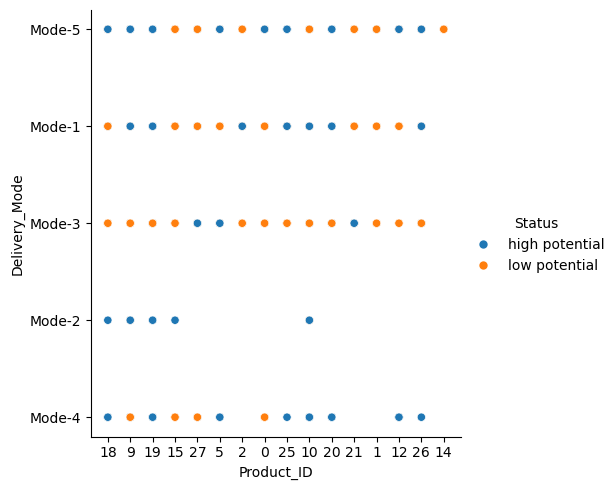

In [44]:
sns.relplot(x='Product_ID', y='Delivery_Mode', data = data, hue = 'Status')

##### Insights :
* Delivery mode 1 exibits high potential in product whose ID is 9, 19, 2, 25, 10, 20, 26.
* Delivery mode 2 exibits high potential in product whose ID is 18, 9, 19, 15, 10 and dont have any low potential.
* Delivery mode 3 exibits high potential in product whose ID is 27, 5, 21
* Delivery mode 4 exibits high potential in product whose ID is 18, 19, 5, 25, 10, 20, 12, 26.
* Delivery mode 5 exibits high potential in product whose ID is 18, 9, 19, 5, 0, 25, 20, 12, 26.

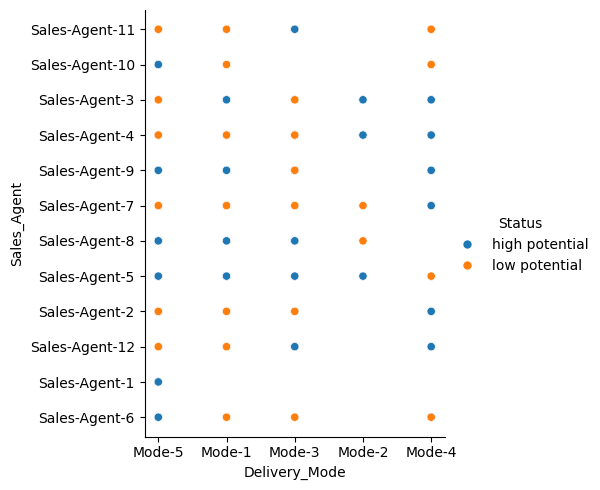

In [45]:
sns.relplot(x='Delivery_Mode', y='Sales_Agent', data = data, hue = 'Status')

##### Insights :
* When the delivery mode is 1st, the Sales Agent 3, 5, 8 and 9 exibits high potential status.
* When the delivery mode is 2nd, the Sales Agent 3, 4 and 5 exibits high potential status.
* When the delivery mode is 3rd, the Sales Agent 5, 8, 11, 12 exibits high potential status.
* When the delivery mode is 4th, the Sales Agent 2, 3, 4, 7, 9 and 12 exibits high potential status.
* When the delivery mode is 5th, the Sales Agent 1, 5, 6, 8, 9 and 10 exibits high potential status.

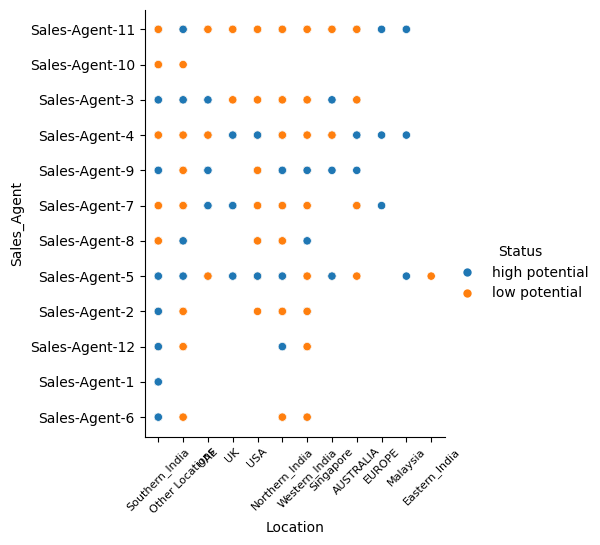

In [46]:
sns.relplot(x='Location', y='Sales_Agent', data = data, hue = 'Status')
plt.xticks(rotation=45, fontsize=8)
plt.show()

##### Insights :
* In Southern India, the Sales Agent 1, 2, 3, 5, 6, 9 and 12 exibits high potential status.
* In Other Location, the Sales Agent 3, 5, 8 and 11 exibits high potential status.
* In UAE, the Sales Agent 3, 7 and 9 exibits high potential status.
* In UK, the Sales Agent 4, 5 and 7 exibits high potential status.
* In USA, the Sales Agent 4 and 5 exibits high potential status.
* In Northern India, the Sales Agent 5, 9 and 12 exibits high potential status.
* In Western India, the Sales Agent 8 and 9 exibits high potential status.
* In Singapore, the Sales Agent 3, 5 and 9 exibits high potential status.
* In Australia, the Sales Agent 4 and 9 exibits high potential status.
* In Europe, the Sales Agent 4, 7 and 11 exibits high potential status.
* In Malaysia, the Sales Agent 4, 5 and 11 exibits high potential status.
* In Eastern India, the Sales Agent 5 exibits low potential status and any other has not been there.

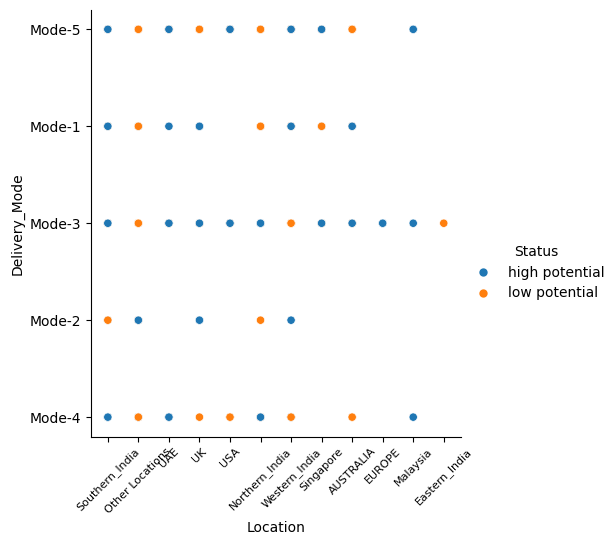

In [47]:
sns.relplot(x='Location', y='Delivery_Mode', data = data, hue = 'Status')
plt.xticks(rotation=45, fontsize=8)
plt.show()

##### Insights :
* The Delivery mode 1 exibits high potential in areas or countries like Southern India, UAE, UK, Western India and Australia.
* The Delivery mode 2 exibits high potential in areas or countries like UK, Western India and Other Locations.
* The Delivery mode 3 exibits high potential in areas or countries like Southern India, UAE, UK, USA, Northern India, Singapore, Australia, Europe and Malaysia.
* The Delivery mode 4 exibits high potential in areas or countries like Southern India, UAE, Northern India and Malaysia.
* The Delivery mode 5 exibits high potential in areas or countries like Southern India, UAE, USA, Western India, Singapore and Malaysia.

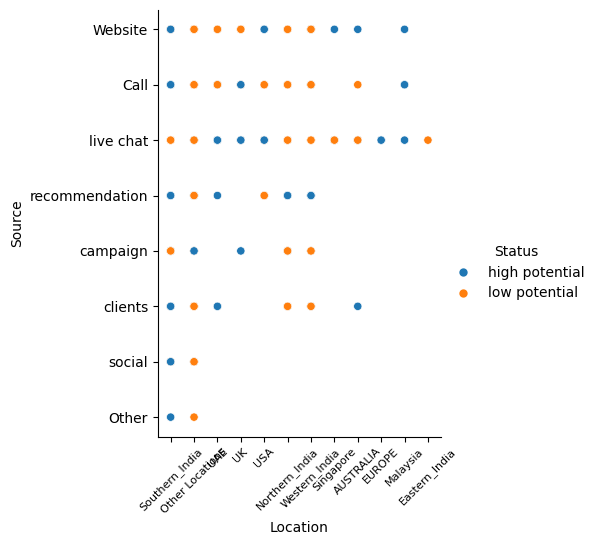

In [48]:
sns.relplot(x='Location', y='Source', data = data, hue = 'Status')
plt.xticks(rotation=45, fontsize=8)
plt.show()

##### Insights :
* In Southern India, sources like website, call, recommendation, clients, social and other exibits high potential status.
* In Other Locations, sources like campaign exibits high potential status.
* In UAE, sources like live chat, recommendation and clients exibits high potential status.
* In UK, sources like call, live chat and campaign exibits high potential status.
* In USA, sources like website and live chat exibits high potential status.
* In Northern India, sources like recommendation exibits high potential status.
* In Western India, sources like recommendation exibits high potential status.
* In Singapore, sources like website exibits high potential status.
* In Australia, sources like website and clients exibits high potential status.
* In Europe, sources like live chat exibits high potential status and no other sources has taken place.
* In Malaysia, sources like website, call and live chat exibits high potential status.
* In Eastern India, sources like live chat exibits low potential status and no other sources has taken place.

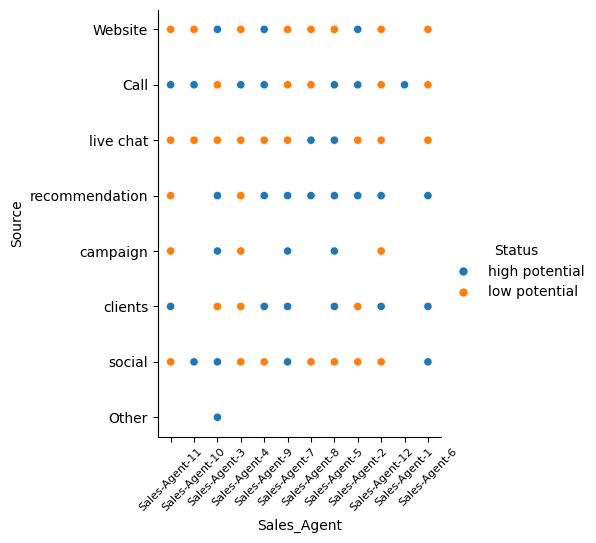

In [49]:
sns.relplot(x='Sales_Agent', y='Source', data = data, hue = 'Status')
plt.xticks(rotation=45, fontsize=8)
plt.show()

##### Insights :
* Sales Agent 1 exibits high potential status when the source is call.
* Sales Agent 2 exibits high potential status when the source is website, call and recommendation.
* Sales Agent 3 exibits high potential status when the source is website, recommendation, campaign, social and other.
* Sales Agent 4 exibits high potential status when the source is call.
* Sales Agent 5 exibits high potential status when the source is call, live chat, recommendation, campaign and clients.
* Sales Agent 6 exibits high potential status when the source is recommendation, clients and social.
* Sales Agent 7 exibits high potential status when the source is recommendation, campaign, clients and social.
* Sales Agent 8 exibits high potential status when the source is live chat and recommendation.
* Sales Agent 9 exibits high potential status when the source is website, call, recommendation and clients.
* Sales Agent 10 exibits high potential status when the source is call and social.
* Sales Agent 11 exibits high potential status when the source is call and clients.
* Sales Agent 12 exibits high potential status when the source is recommendation and clients.

### Bivariate Analysis using barplot

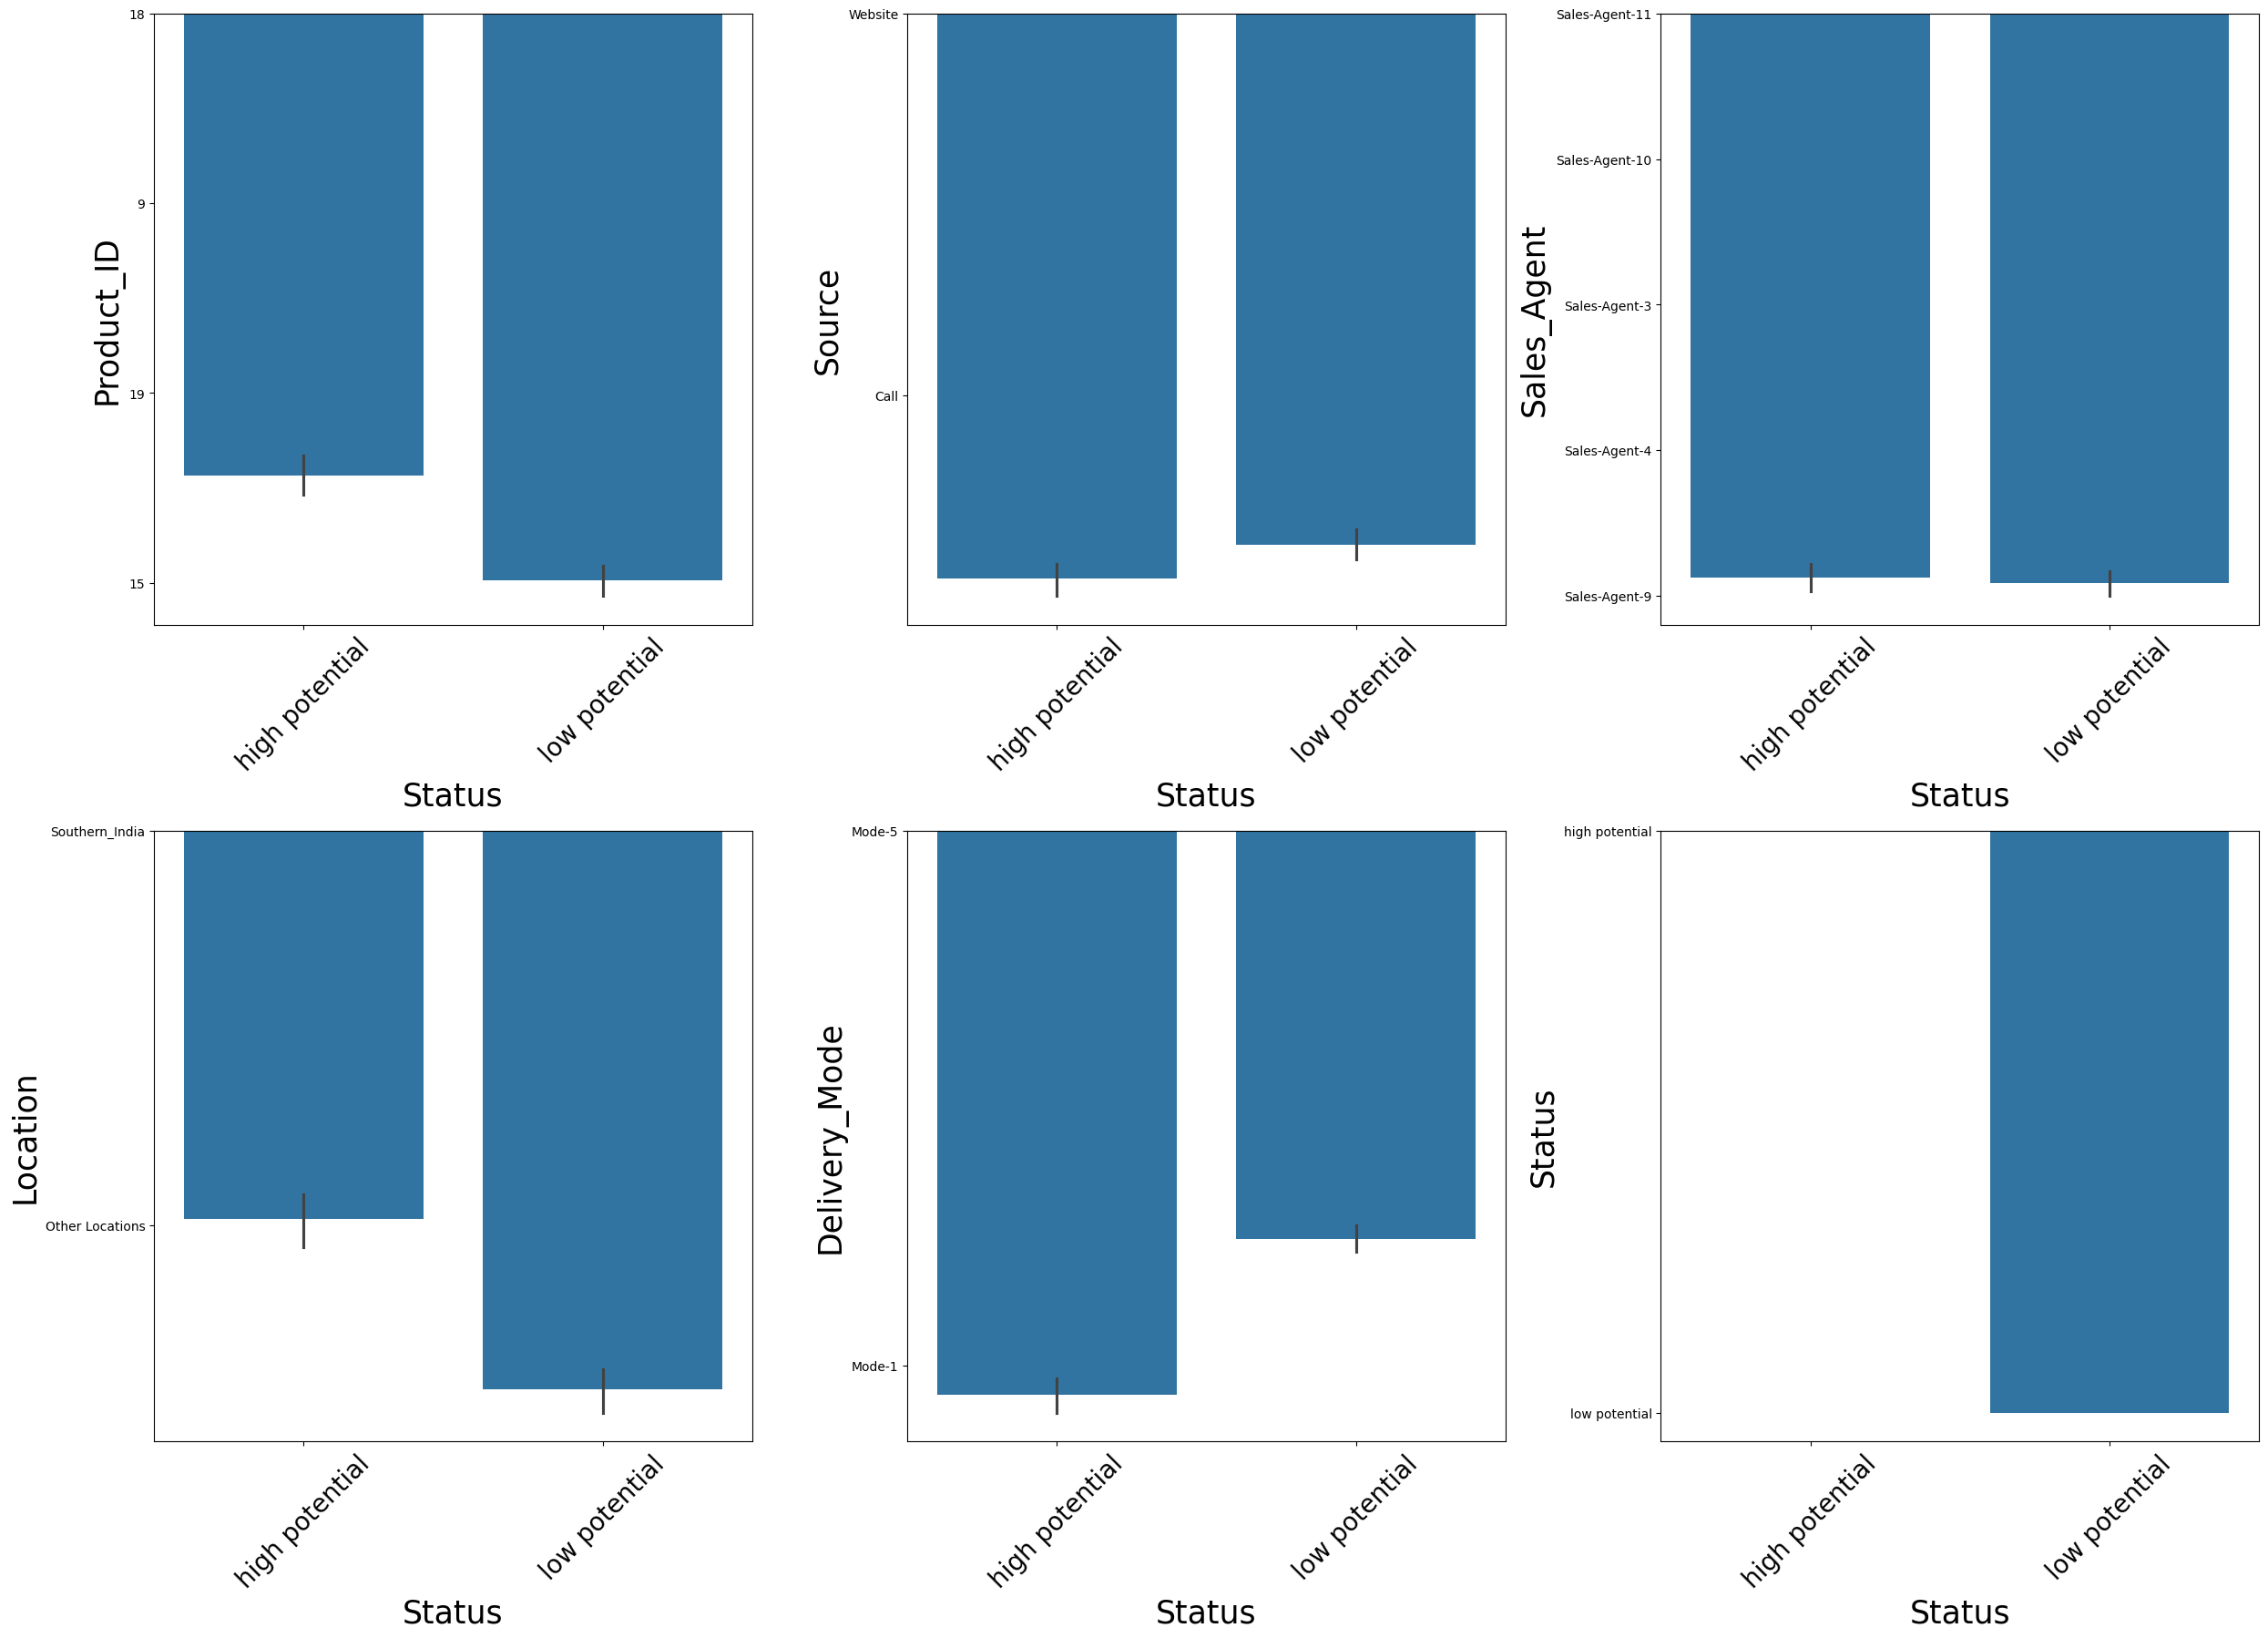

In [50]:
plt.figure(figsize=(25,25),facecolor='white')

plotnum=1

for c in data:
    if(plotnum<21):
        ax=plt.subplot(3,3,plotnum)
        sns.barplot(x=data.Status,y=data[c])
        plt.xlabel('Status',fontsize=25)
        plt.ylabel(c,fontsize=25)  
        plt.xticks(rotation=45, fontsize=20)
    plotnum+=1

plt.tight_layout()

### Bivariate analysis using lineplot

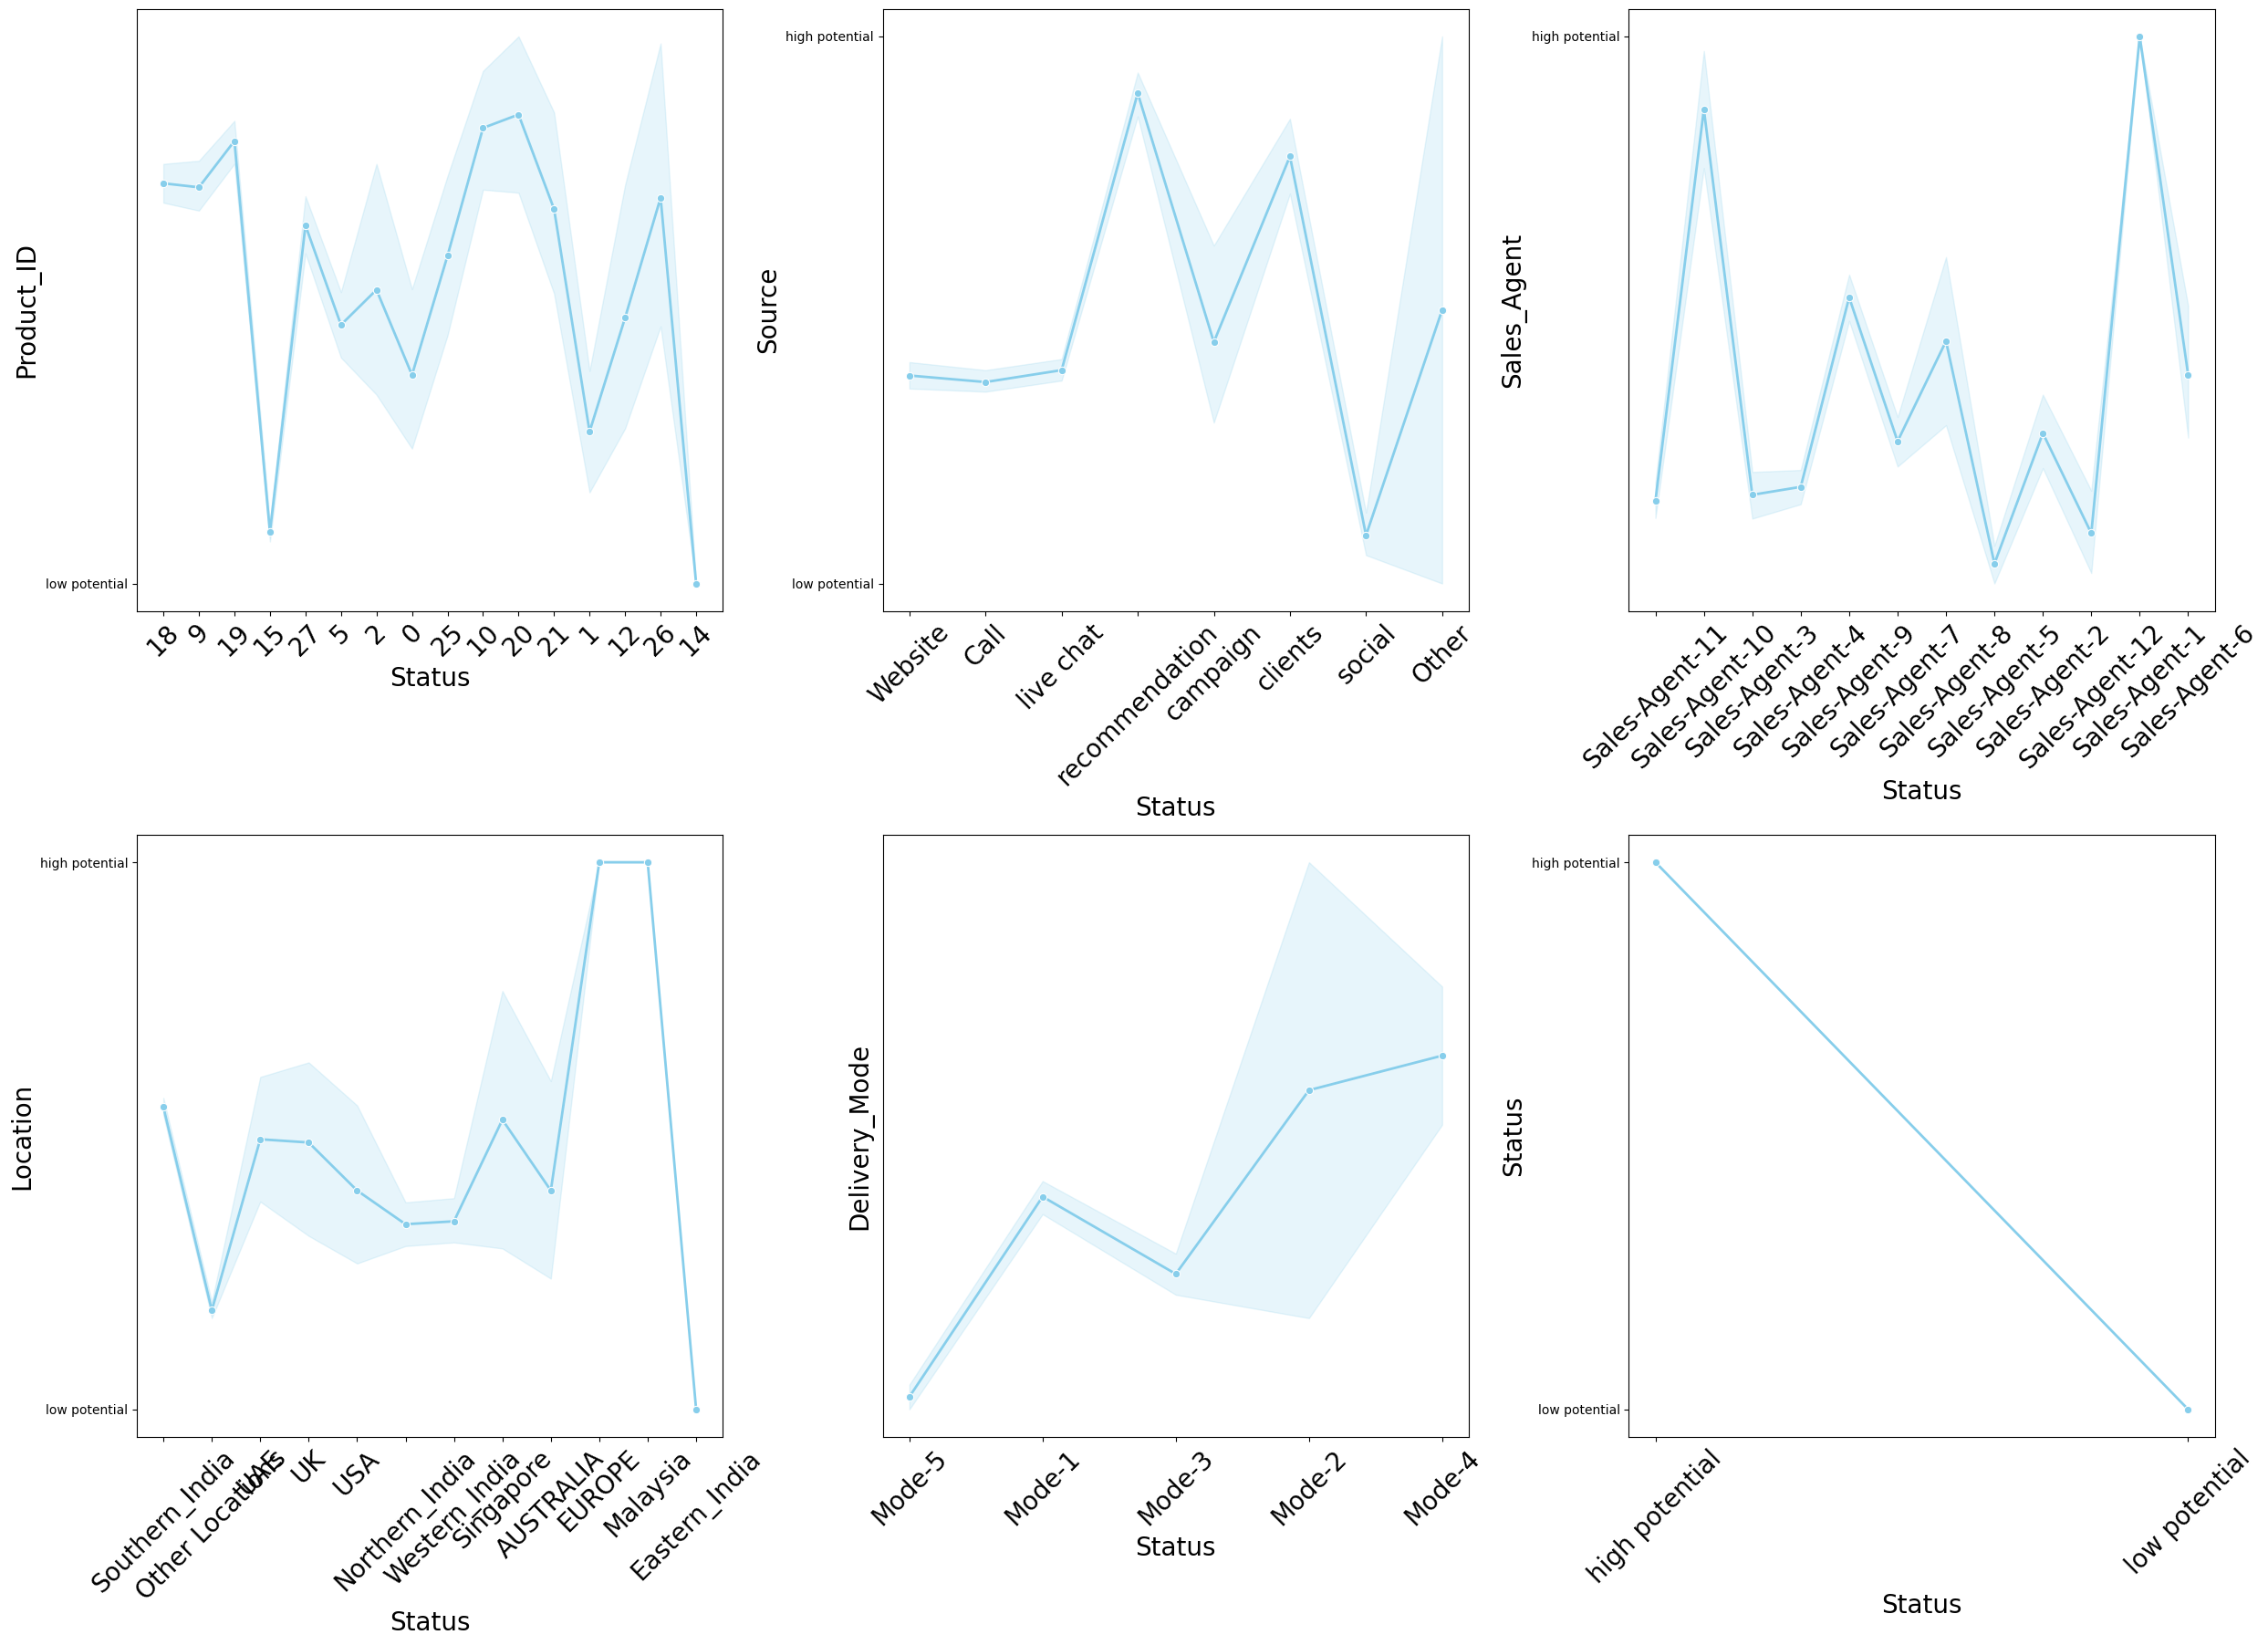

In [51]:
plt.figure(figsize=(25,25),facecolor='white')

plotnum=1

for c in data:
    if(plotnum<21):
        ax=plt.subplot(3,3,plotnum)
        sns.lineplot(x=data[c], y='Status', data=data, color='skyblue', marker='o', linewidth=2)
        plt.xlabel('Status',fontsize=20)
        plt.ylabel(c,fontsize=20)    
        plt.xticks(rotation=45, fontsize=20)

    plotnum+=1

plt.tight_layout() 

### Bivariate analysis using histplot

<AxesSubplot:xlabel='Status', ylabel='Count'>

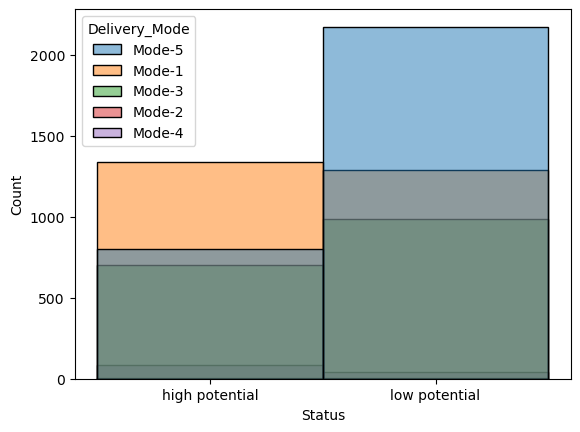

In [52]:
sns.histplot(x='Status',hue='Delivery_Mode',data=data)

##### Insights :
* Delivery Mode 5 exhibits the highest likelihood of resulting in low potential outcomes.
* Delivery Mode 1 demonstrates the highest probability of achieving high potential outcomes.

# Data Analysis Report 
##### Based on the provided insights, several patterns emerge in the data analysis:

* Product 15 predominantly exhibits low potential, suggesting potential mismatches with customer expectations or limitations hindering its market acceptance.

* Products with IDs 19, 10, and 20 tend to have high potential, likely due to resonating features or market positioning that align well with customer preferences.

* Interactions from sources like the website, call, live chat, and social platforms often lead to low potential outcomes, indicating potential inefficiencies or challenges in these channels.

* Certain sales agents (e.g., 2, 3, 4, 5, 7, 11, 12) are more associated with low potential outcomes, while others (e.g., 1, 6, 8, 9, 10) tend to achieve high potential results, suggesting varying levels of sales effectiveness.

* Regions like Northern India, Western India, and Australia are more prone to low potential outcomes, possibly due to regional dynamics or market conditions.

* Specific delivery modes and sources show distinct patterns of association with potential outcomes, with some modes/sources consistently linked to high potential (e.g., delivery mode 4, website) and others to low potential (e.g., delivery mode 5, live chat).

* Sales agents demonstrate varying degrees of effectiveness across different regions and sources, with some agents consistently achieving high potential outcomes in specific contexts.

* Certain regions and sources exhibit consistent patterns of association with high or low potential outcomes, highlighting the importance of contextual factors in sales performance.

* Detailed analysis reveals specific product-agent-source combinations that consistently lead to high potential outcomes, offering insights for targeted sales strategies.

* Overall, the analysis underscores the significance of understanding product-market fit, sales agent performance, and contextual factors in driving successful outcomes and optimizing sales strategies.

# Data Preprocessing

## Encoding
### Manual Encoding

In [53]:
data.loc[data['Source']=='live chat','Source']=1
data.loc[data['Source']=='Call','Source']=2
data.loc[data['Source']=='Website','Source']=3
data.loc[data['Source']=='recommendation','Source']=4
data.loc[data['Source']=='social','Source']=5
data.loc[data['Source']=='clients','Source']=6
data.loc[data['Source']=='campaign','Source']=7
data.loc[data['Source']=='Other','Source']=8

data.loc[data['Sales_Agent']=='Sales-Agent-1','Sales_Agent']=1
data.loc[data['Sales_Agent']=='Sales-Agent-2','Sales_Agent']=2
data.loc[data['Sales_Agent']=='Sales-Agent-3','Sales_Agent']=3
data.loc[data['Sales_Agent']=='Sales-Agent-4','Sales_Agent']=4
data.loc[data['Sales_Agent']=='Sales-Agent-5','Sales_Agent']=5
data.loc[data['Sales_Agent']=='Sales-Agent-6','Sales_Agent']=6
data.loc[data['Sales_Agent']=='Sales-Agent-7','Sales_Agent']=7
data.loc[data['Sales_Agent']=='Sales-Agent-8','Sales_Agent']=8
data.loc[data['Sales_Agent']=='Sales-Agent-9','Sales_Agent']=9
data.loc[data['Sales_Agent']=='Sales-Agent-10','Sales_Agent']=10
data.loc[data['Sales_Agent']=='Sales-Agent-11','Sales_Agent']=11
data.loc[data['Sales_Agent']=='Sales-Agent-12','Sales_Agent']=12

data.loc[data['Location']=='Southern_India','Location']=1
data.loc[data['Location']=='Other Locations','Location']=2
data.loc[data['Location']=='Western_India','Location']=3
data.loc[data['Location']=='Northern_India','Location']=4
data.loc[data['Location']=='UAE','Location']=5
data.loc[data['Location']=='USA','Location']=6
data.loc[data['Location']=='UK','Location']=7
data.loc[data['Location']=='AUSTRALIA','Location']=8
data.loc[data['Location']=='Singapore','Location']=9
data.loc[data['Location']=='Malaysia','Location']=10
data.loc[data['Location']=='EUROPE','Location']=11
data.loc[data['Location']=='Eastern_India','Location']=12

data.loc[data['Delivery_Mode']=='Mode-1','Delivery_Mode']=1
data.loc[data['Delivery_Mode']=='Mode-2','Delivery_Mode']=2
data.loc[data['Delivery_Mode']=='Mode-3','Delivery_Mode']=3
data.loc[data['Delivery_Mode']=='Mode-4','Delivery_Mode']=4
data.loc[data['Delivery_Mode']=='Mode-5','Delivery_Mode']=5

data.loc[data['Status']=='high potential','Status']=1
data.loc[data['Status']=='low potential','Status']=0

In [54]:
data['Product_ID'] = data['Product_ID'].astype(int) 
data['Source'] = data['Source'].astype(int) 
data['Sales_Agent'] = data['Sales_Agent'].astype(int) 
data['Location'] = data['Location'].astype(int) 
data['Delivery_Mode'] = data['Delivery_Mode'].astype(int) 
data['Status'] = data['Status'].astype(int) 

In [55]:
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,18,3,11,1,5,1
1,18,3,10,1,5,1
2,18,3,10,1,5,1
3,18,3,10,1,5,1
4,18,3,10,1,5,1


## Scaling with MinMaxScaler

In [56]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df = data[['Product_ID','Source','Sales_Agent','Location','Delivery_Mode']]
scaled_data = sc.fit_transform(df)
scaled_data

array([[0.66666667, 0.28571429, 0.90909091, 0.        , 1.        ],
       [0.66666667, 0.28571429, 0.81818182, 0.        , 1.        ],
       [0.66666667, 0.28571429, 0.81818182, 0.        , 1.        ],
       ...,
       [0.18518519, 0.        , 0.90909091, 0.        , 0.        ],
       [0.77777778, 0.71428571, 0.27272727, 0.09090909, 0.        ],
       [0.92592593, 0.28571429, 0.18181818, 0.        , 0.        ]])

In [57]:
df2 = pd.DataFrame(scaled_data, columns=['Product_ID','Source','Sales_Agent','Location','Delivery_Mode'])
df2

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode
0,0.666667,0.285714,0.909091,0.000000,1.00
1,0.666667,0.285714,0.818182,0.000000,1.00
2,0.666667,0.285714,0.818182,0.000000,1.00
3,0.666667,0.285714,0.818182,0.000000,1.00
4,0.666667,0.285714,0.818182,0.000000,1.00
...,...,...,...,...,...
7417,0.333333,0.142857,0.454545,0.181818,0.75
7418,0.555556,0.142857,1.000000,0.090909,1.00
7419,0.185185,0.000000,0.909091,0.000000,0.00
7420,0.777778,0.714286,0.272727,0.090909,0.00


In [58]:
final_data = pd.concat([df2,data[['Status']]],axis=1)
final_data

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,0.666667,0.285714,0.909091,0.000000,1.00,1
1,0.666667,0.285714,0.818182,0.000000,1.00,1
2,0.666667,0.285714,0.818182,0.000000,1.00,1
3,0.666667,0.285714,0.818182,0.000000,1.00,1
4,0.666667,0.285714,0.818182,0.000000,1.00,1
...,...,...,...,...,...,...
7417,0.333333,0.142857,0.454545,0.181818,0.75,0
7418,0.555556,0.142857,1.000000,0.090909,1.00,0
7419,0.185185,0.000000,0.909091,0.000000,0.00,0
7420,0.777778,0.714286,0.272727,0.090909,0.00,0


# Feature Scaling

<AxesSubplot:>

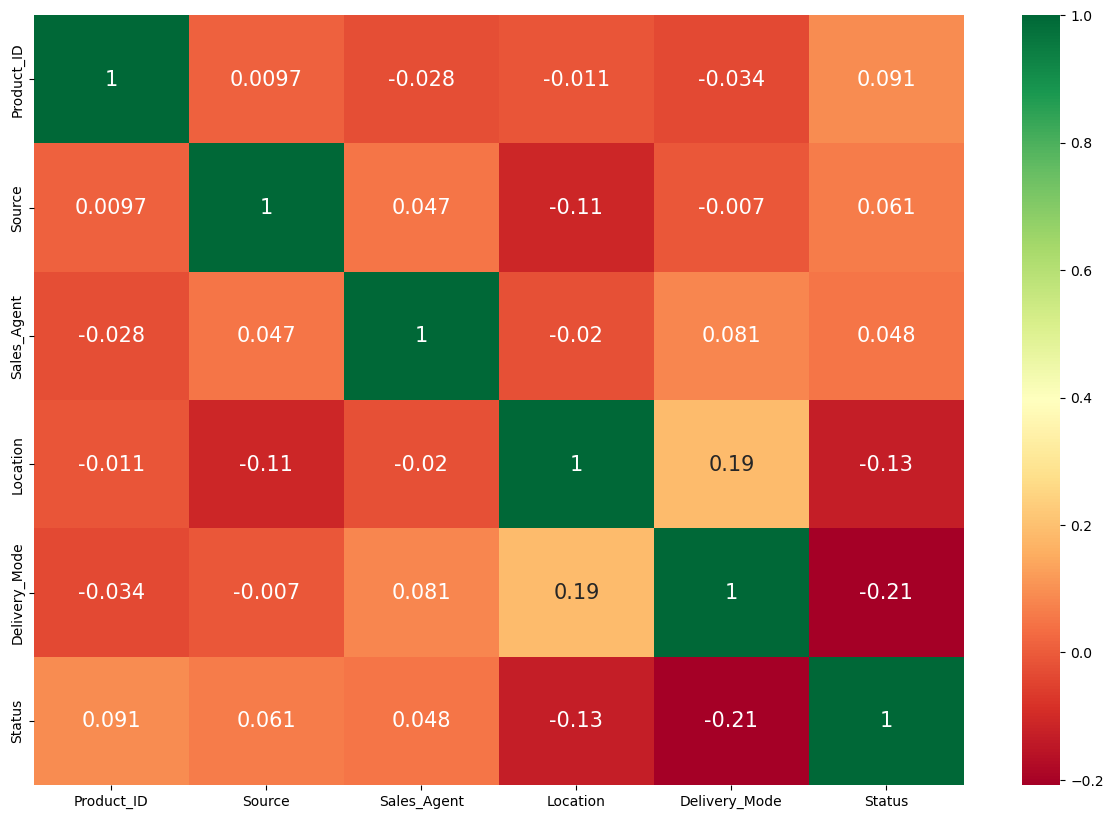

In [59]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,cmap="RdYlGn", annot_kws={"size":15})

##### Insights:-
* As we can see there is not much correlation between the any two columns, hence we cannot remove any column further.

# Model Creation

In [60]:
## Creating independent and dependent variable
X=final_data.iloc[:,:-1]
y=final_data.Status

In [61]:
X.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode
0,0.666667,0.285714,0.909091,0.0,1.0
1,0.666667,0.285714,0.818182,0.0,1.0
2,0.666667,0.285714,0.818182,0.0,1.0
3,0.666667,0.285714,0.818182,0.0,1.0
4,0.666667,0.285714,0.818182,0.0,1.0


In [62]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Status, dtype: int32

## Train Test Split

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=45)

In [64]:
y_train.value_counts()

0    3555
1    2382
Name: Status, dtype: int64

## Smoting Technique

In [65]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

In [66]:
y_train_smote.value_counts()

0    3555
1    3555
Name: Status, dtype: int64

# Model Evaluation

## Logistic Regression Algorithm

In [218]:
from sklearn.metrics import f1_score,accuracy_score,recall_score,precision_score,classification_report

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train_smote,y_train_smote)
LR_y_train_predict=LR.predict(X_test)
accuracy = accuracy_score(y_test,LR_y_train_predict)
print("Accuracy:",accuracy*100,"%")

classification = classification_report(y_test,LR_y_train_predict)
print("\n",classification)

Accuracy: 62.35690235690235 %

               precision    recall  f1-score   support

           0       0.73      0.64      0.68       936
           1       0.49      0.60      0.54       549

    accuracy                           0.62      1485
   macro avg       0.61      0.62      0.61      1485
weighted avg       0.64      0.62      0.63      1485



### Cross validation on Logistic Regression

In [219]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation and compute accuracy scores
scores = cross_val_score(LR, X, y, cv=10, scoring='accuracy')

print("Cross Validation Score of Logistic Regression:", scores.mean()*100,"%")
print("Std:", scores.std())

Cross Validation Score of Logistic Regression: 62.71805494589212 %
Std: 0.052985992417701154


## SVM (Support Vector Machine) Algorithm

In [220]:
# Support Vector Machine

from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_smote, y_train_smote)
y_hat = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_hat)
print("Accuracy:",accuracy*100,"%")

classification = classification_report(y_test, y_hat)
print("\n",classification)

Accuracy: 65.25252525252525 %

               precision    recall  f1-score   support

           0       0.79      0.61      0.69       936
           1       0.52      0.73      0.61       549

    accuracy                           0.65      1485
   macro avg       0.66      0.67      0.65      1485
weighted avg       0.69      0.65      0.66      1485



### Cross Validation on SVC

In [221]:
# Perform cross-validation and compute accuracy scores
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')

print("Cross Validation Score of SVC:", scores.mean()*100,"%")
print("Std:", scores.std())

Cross Validation Score of SVC: 65.3054202203495 %
Std: 0.03680373079481358


## KNN (K-Nearest Neighbor) Algorithm

Accuracy: 68.08080808080808 %

               precision    recall  f1-score   support

           0       0.75      0.73      0.74       936
           1       0.56      0.59      0.58       549

    accuracy                           0.68      1485
   macro avg       0.66      0.66      0.66      1485
weighted avg       0.68      0.68      0.68      1485



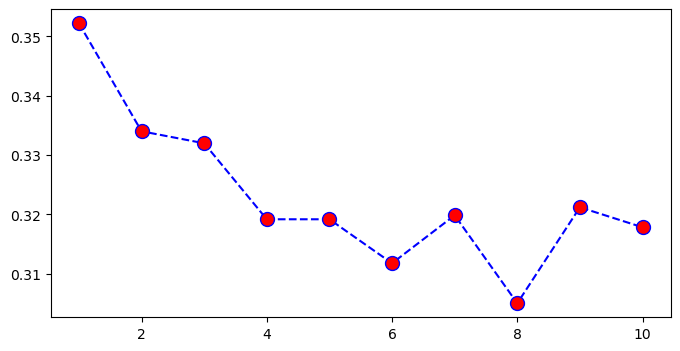

In [222]:
# Knn 

import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
error_rate =[]
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_smote, y_train_smote)
    y_new = knn.predict(X_test)
    error_rate.append(np.mean(y_new != y_test))
    
plt.figure(figsize=(8,4))
plt.plot(range(1,11),error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)

knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(X_train_smote, y_train_smote)
y_new = knn1.predict(X_test)
accuracy = accuracy_score(y_test, y_new)
print("Accuracy:",accuracy*100,"%")

classification = classification_report(y_test, y_new)
print("\n",classification)

### Cross Validation on KNN

In [223]:
# Perform cross-validation and compute accuracy scores
scores = cross_val_score(knn1, X, y, cv=10, scoring='accuracy')

# Print the results
print("Cross Validation Score of KNN:", scores.mean()*100,"%")
print("Std:", scores.std())

Cross Validation Score of KNN: 66.84188091549883 %
Std: 0.024187476527380774


## Decision tree Classifier Algorithm

In [224]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier() 
dt.fit(X_train_smote, y_train_smote)
y_hat=dt.predict(X_test)
accuracy = accuracy_score(y_test, y_hat)
print("Accuracy:",accuracy*100,"%")

classification = classification_report(y_test, y_hat)
print("\n",classification)

Accuracy: 68.21548821548822 %

               precision    recall  f1-score   support

           0       0.76      0.72      0.74       936
           1       0.56      0.62      0.59       549

    accuracy                           0.68      1485
   macro avg       0.66      0.67      0.66      1485
weighted avg       0.69      0.68      0.68      1485



### Cross Validation on Decision Tree Classifier

In [225]:
# Perform cross-validation and compute accuracy scores
scores = cross_val_score(dt, X, y, cv=10, scoring='accuracy')

# Print the results
print("Cross Validation Score of Decision Tree Classifier:", scores.mean()*100,"%")
print("Std:", scores.std())

Cross Validation Score of Decision Tree Classifier: 67.70368905834509 %
Std: 0.028802053970212117


### Grid Search CV on Decision Tree (Hyperparameter Tuning)

In [126]:
from sklearn.model_selection import GridSearchCV

params = {
    'criterion': ['gini', 'entropy'], 
    'splitter': ['best', 'random'],  
    'max_depth': [None, 5, 10, 15],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4] 
}

tree_clf = DecisionTreeClassifier(random_state=3)

tree_cv = GridSearchCV(estimator=tree_clf, param_grid=params, cv=5)

tree_cv.fit(X_train_smote,y_train_smote)

best_params = tree_cv.best_params_ 

print(f"Best paramters: {best_params})")

Best paramters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'})


### Decision Tree regressor with best hyperparameter

In [127]:
dt1=DecisionTreeClassifier(criterion= 'gini', max_depth= 15, min_samples_leaf= 1, min_samples_split= 2, splitter= 'random')
dt1.fit(X_train,y_train)
y_hat1=dt1.predict(X_test)
acc2=accuracy_score(y_test,y_hat1)
print("Accuracy:",acc2*100,"%")

Accuracy: 68.75420875420876 %


## Random Forest Classifier Algorithm

In [128]:
from sklearn.ensemble import RandomForestClassifier#importing randomforest

rf_clf = RandomForestClassifier(n_estimators=100)#object creation ,taking 100 decision tree in random forest 
rf_clf.fit(X_train_smote,y_train_smote)
y_predict=rf_clf.predict(X_test)
acc2=accuracy_score(y_test,y_predict)
print("Accuracy:",acc2*100,"%")

classification = classification_report(y_test, y_predict)
print("\n",classification)

Accuracy: 68.35016835016835 %

               precision    recall  f1-score   support

           0       0.79      0.68      0.73       936
           1       0.56      0.68      0.61       549

    accuracy                           0.68      1485
   macro avg       0.67      0.68      0.67      1485
weighted avg       0.70      0.68      0.69      1485



### Cross Validation on Random Forest

In [129]:
# Perform cross-validation and compute accuracy scores
scores = cross_val_score(rf_clf, X, y, cv=10, scoring='accuracy')

# Print the results
print("Cross Validation Score of Random Forest:", scores.mean()*100,"%")
print("Std:", scores.std())

Cross Validation Score of Random Forest: 68.0272661643443 %
Std: 0.02833301389325252


### Randomized Search CV with Random Forest (Hyperparameter Tuning)

In [130]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=1, random_state=42, n_jobs=-1)

rf_cv.fit(X_train, y_train)
rf_best_params = rf_cv.best_params_##it will give you best parameters 
print(f"Best params: {rf_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best params: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True})


### Random Forest with best hyperparameter

In [131]:
rf_clf2 = RandomForestClassifier(n_estimators= 400, min_samples_split= 2, min_samples_leaf= 4, max_features= 'sqrt', max_depth= 10, bootstrap= True) #passing best parameter to randomforest
rf_clf2.fit(X_train_smote, y_train_smote) #training 
y_predict=rf_clf2.predict(X_test) #testing
acc=accuracy_score(y_test,y_predict)
print("Accuracy:",acc*100,"%")

Accuracy: 69.42760942760943 %


## Gradient Boosting Algorithm

In [132]:
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier() ## object creation
gbm.fit(X_train_smote,y_train_smote) ## fitting the data
y_gbm=gbm.predict(X_test)
accu_scor=accuracy_score(y_test,y_gbm)
print("Accuracy:",accu_scor*100,"%")

classification = classification_report(y_test, y_gbm)
print("\n",classification)

Accuracy: 69.2929292929293 %

               precision    recall  f1-score   support

           0       0.83      0.65      0.73       936
           1       0.56      0.77      0.65       549

    accuracy                           0.69      1485
   macro avg       0.69      0.71      0.69      1485
weighted avg       0.73      0.69      0.70      1485



### Cross Validation on Gradient Boosting

In [133]:
# Perform cross-validation and compute accuracy scores
scores = cross_val_score(gbm, X, y, cv=10, scoring='accuracy')

# Print the results
print("Cross Validation Score of Gradient Boosting:", scores.mean()*100,"%")
print("Std:", scores.std())

Cross Validation Score of Gradient Boosting: 70.81588083568835 %
Std: 0.03375040074641999


## XGBoost Algorithm

In [134]:
from xgboost import XGBClassifier#importing the model library
xgb_r=XGBClassifier() ## object creation
xgb_r.fit(X_train_smote,y_train_smote)# fitting the data
y_hat=xgb_r.predict(X_test)
accu_scor=accuracy_score(y_test,y_hat)
print("Accuracy:",accu_scor*100,"%")

classification = classification_report(y_test, y_hat)
print("\n",classification)

Accuracy: 69.56228956228956 %

               precision    recall  f1-score   support

           0       0.81      0.67      0.74       936
           1       0.57      0.74      0.64       549

    accuracy                           0.70      1485
   macro avg       0.69      0.70      0.69      1485
weighted avg       0.72      0.70      0.70      1485



### Cross Validation on XgBoost

In [135]:
# Perform cross-validation and compute accuracy scores
scores = cross_val_score(xgb_r, X, y, cv=10, scoring='accuracy')

# Print the results
print("Cross Validation Score of XgBoost:", scores.mean()*100,"%")
print("Std:", scores.std())

Cross Validation Score of XgBoost: 69.79232948670973 %
Std: 0.03260579941363867


### Randomized Search CV with XGBoost (Hyperparameter Tuning)

In [136]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

XGB=XGBClassifier(random_state=42,verbosity=0,silent=0)
rcv= RandomizedSearchCV(estimator=XGB, scoring='f1',param_distributions=param_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
                        
rcv.fit(X_train, y_train)
cv_best_params = rcv.best_params_
print(f"Best paramters: {cv_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'reg_lambda': 0.2, 'reg_alpha': 0.8, 'n_estimators': 100, 'max_depth': 11, 'learning_rate': 0.1, 'gamma': 0.2})


### XGBoost with best hyperparameter

In [137]:
XGB2 = XGBClassifier(reg_lambda=0.2, reg_alpha=0.8, n_estimators=100, max_depth=11, learning_rate=0.1, gamma=0.2)
XGB2.fit(X_train, y_train)  # Training
y_predict = XGB2.predict(X_test)  # Testing
acc = accuracy_score(y_test,y_predict) 
print("Accuracy:",acc*100,"%")

Accuracy: 72.45791245791246 %


## ANN (Artificial Neural Network)

In [140]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier( hidden_layer_sizes=(50,3),
                       learning_rate_init=0.1,
                       max_iter=100,
                       random_state=2)
model.fit(X_train_smote,y_train_smote) 
y_predict = model.predict(X_test)
print("Accuracy :",accuracy_score(y_test,y_predict)*100,"%")

classification = classification_report(y_test, y_predict)
print("\n",classification)

Accuracy : 63.030303030303024 %

               precision    recall  f1-score   support

           0       0.63      1.00      0.77       936
           1       0.00      0.00      0.00       549

    accuracy                           0.63      1485
   macro avg       0.32      0.50      0.39      1485
weighted avg       0.40      0.63      0.49      1485



### Grid Search on ANN (Hyperparameter Tuning)

In [141]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive'],
}

# Create an ANN classifier
mlp = MLPClassifier(max_iter=1000)

# Perform GridSearchCV
grid_search = GridSearchCV(mlp, param_grid, cv=5)
grid_search.fit(X, y)

# Print the best hyperparameters and corresponding accuracy score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy Score: ", grid_search.best_score_)

Best Hyperparameters:  {'activation': 'tanh', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'adam'}
Best Accuracy Score:  0.681213936308276


### ANN with best hyperparameter

In [143]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Instantiate MLPClassifier with specified hyperparameters
ANN1 = MLPClassifier(activation='tanh', hidden_layer_sizes=(50,), learning_rate='constant', solver='adam')

# Training
ANN1.fit(X_train, y_train)

# Testing
y_predict = ANN1.predict(X_test)

# Calculate accuracy
acc = accuracy_score(y_test, y_predict)
print("Accuracy:", acc * 100, "%")

Accuracy: 69.4949494949495 %


# Model Comparison Report

* Logistic Regression :- 62.35 %
* Cross validation on logistic regression :- 62.71 %


* Support Vector Machine :- 65.25 %
* Cross validation on SVM :- 65.30 %


* K-Nearest Neighbor :- 68.08 %
* Cross validation on KNN :- 66.84 %


* Decision Tree Classifier :- 68.21 %
* Cross validation on Decision Tree Classifier :- 67.70 %
* Decision Tree with best hyperparameter :- 68.75 %


* Random Forest Classifier :- 68.35 %
* Cross validation on Random Forest Classifier :- 68.03 %
* Random Forest with best hyperparameter :- 69.42 %


* Gradient Boosting :- 69.29 %
* Cross validation on Gradient Boosting :- 70.82 %


* XGBoost :- 69.56 %
* Cross validation on XGBoost :- 69.79 %
* XGBoost with best hyperparameter :- 72.46 %


* Artificial Neural Network :- 63.03 %
* ANN with best hyperparameter :- 69.49 %

##### The best accuracy is given by the XGBoost with best hyperparameter i.e. 72.46 %

# Conclusion 
Based on the insights gathered, it's evident that Product 15 faces challenges meeting customer expectations, while Products 19, 10, and 20 enjoy favorable perceptions. Interactions from sources like website, call, and live chat often lead to low potential outcomes, suggesting areas for improvement in customer engagement strategies. Certain sales agents demonstrate consistent performance trends, with some excelling in generating high potential outcomes. Geographical factors also play a significant role, with regions like Northern India and Western India showing tendencies towards low potential outcomes. Delivery modes and sources exhibit varying impacts on potential outcomes, indicating the need for tailored approaches. Overall, a strategic focus on product differentiation, targeted sales training, and enhanced customer experiences can help optimize performance and drive sustained growth in diverse markets.

# Thank you for taking the time to review this project.
Best regards,

Vinay D Gaikwad